In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import random
import pandas as pd

!pip install librosa
import librosa

In [0]:

mnist_data = input_data.read_data_sets('MNIST_data', one_hot=True)
# mnist_train_x, mnist_test_x = mnist_train_x/255.0, mnist_test_x/255.0

# print(type(mnist_data.train))

In [0]:
# print(mnist_data.validation)
n_train = mnist_data.train.num_examples # 55,000
n_test = mnist_data.test.num_examples # 10,000

In [0]:
n_input = 784   # input layer (28x28 pixels)
n_hidden1 = 1024 # 1st hidden layer
n_hidden2 = 1024 # 2nd hidden layer
n_hidden3 = 1024 # 3rd hidden layer
n_hidden4 = 1024 # 4th hidden layer
n_hidden5 = 1024 # 5th hidden layer
n_output = 10   # output layer (0-9 digits)
# Setting learning rate to 0.0001
lr = 1e-4
n_iterations = 1000
batch_size = 512
dropout = 0.5

In [0]:
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])
training = tf.placeholder_with_default(False, shape=(), name='training')
keep_prob = tf.placeholder(tf.float32) 

weights = [ 
            tf.Variable(tf.random_normal([n_input, n_hidden1], stddev=np.sqrt(2/n_input))),
            tf.Variable(tf.random_normal([n_hidden1, n_hidden2], stddev=np.sqrt(2/n_hidden1))),
            tf.Variable(tf.random_normal([n_hidden2, n_hidden3], stddev=np.sqrt(2/n_hidden2))),
            tf.Variable(tf.random_normal([n_hidden3, n_hidden4], stddev=np.sqrt(2/n_hidden3))),
            tf.Variable(tf.random_normal([n_hidden4, n_hidden5], stddev=np.sqrt(2/n_hidden4))),
            tf.Variable(tf.random_normal([n_hidden5, n_output], stddev=np.sqrt(2/n_hidden5))),
          ]
biases = [
            tf.Variable(tf.constant(0.0, shape=[n_hidden1])),
            tf.Variable(tf.constant(0.0, shape=[n_hidden2])),
            tf.Variable(tf.constant(0.0, shape=[n_hidden3])),
            tf.Variable(tf.constant(0.0, shape=[n_hidden4])),
            tf.Variable(tf.constant(0.0, shape=[n_hidden5])),
            tf.Variable(tf.constant(0.0, shape=[n_output]))
         ]
def layer_output(weights, biases, X):
  layer = []
  act_out = X
  for i in range(0,5):
    layer.append(tf.nn.relu(tf.add(tf.matmul(act_out, weights[i]), biases[i])))
    act_out = layer[i]

  output_layer = tf.matmul(layer[-1], weights[5]) + biases[5]
  return output_layer

output_layer = layer_output(weights, biases, X)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=output_layer))
train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

correct_pred = tf.equal(tf.argmax(output_layer, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [0]:
for i in range(n_iterations):
    batch_x, batch_y = mnist_data.train.next_batch(batch_size)
    sess.run(train_step, feed_dict={X: batch_x, Y: batch_y, keep_prob:dropout})

    # print loss and accuracy (per minibatch)
    if i%100==0:
        minibatch_loss, minibatch_accuracy = sess.run([cross_entropy, accuracy], feed_dict={X: batch_x, Y: batch_y, keep_prob:1.0})
        print("Iteration", str(i), "\t| Loss =", str(minibatch_loss), "\t| Accuracy =", str(minibatch_accuracy))

In [0]:
test_accuracy = sess.run(accuracy, feed_dict={X: mnist_data.test.images, Y: mnist_data.test.labels, keep_prob:1.0})
print("\nAccuracy on test set:", test_accuracy)


Accuracy on test set: 0.9812


In [0]:
import matplotlib.pyplot as plt

# with sess.as_default():
weights_comp = []
for d in [10, 20, 50, 100, 200, 784]:
  weights_d = []
  for i in range(5):
    w = weights[i]
    s,u,v = tf.svd(w)
    w_t = tf.matmul(u[:,:d], tf.matmul(tf.linalg.diag(s[:d]), v[:,:d], adjoint_b=True))
#     u1, s1, v_adj = np.linalg.svd(w, full_matrices=False)
#     w_t = np.dot(u1, np.dot(np.diag(s1), v_adj))
    weights_d.append(w_t)
  #     eps=1e-7
  #     si = tf.where(tf.less(s, eps), s, tf.sqrt(s))
  #     w_t = tf.matmul(tf.matmul(u[:,0:d], tf.diag(s[0:d])), v[:,0:d], transpose_b=True)
  weights_d.append(weights[-1])
  weights_comp.append(weights_d)
# ww = weights_d[0].eval()
#   print(ww.shape)


Accuracy on test set: 0.1246

Accuracy on test set: 0.2058

Accuracy on test set: 0.3421

Accuracy on test set: 0.5666

Accuracy on test set: 0.588

Accuracy on test set: 0.9805


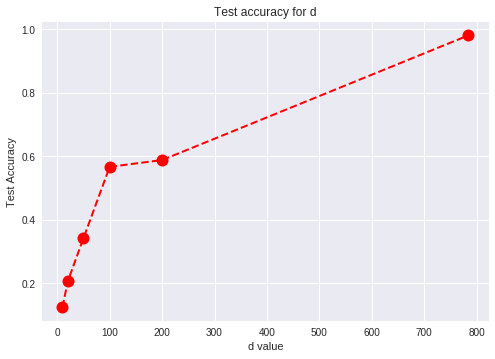

In [0]:
d = [10, 20, 50, 100, 200, 784]
acc_d = []
for i in range(6):
  output_layer = layer_output(weights_comp[i], biases, X)
  correct_pred = tf.equal(tf.argmax(output_layer, 1), tf.argmax(Y, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
  test_accuracy = sess.run(accuracy, feed_dict={X: mnist_data.test.images, Y: mnist_data.test.labels})
  print("\nAccuracy on test set:", test_accuracy)
  acc_d.append(test_accuracy)
plt.plot(d, acc_d, 'ro--', linewidth=2, markersize=12)
plt.xlabel('d value')
plt.ylabel('Test Accuracy')
plt.title('Test accuracy for d')
plt.show()

In [0]:
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])
training = tf.placeholder_with_default(False, shape=(), name='training')
keep_prob = tf.placeholder(tf.float32) 
lr = 1e-4

weights = [ 
            tf.Variable(tf.random_normal([n_input, n_hidden1], stddev=np.sqrt(2/n_input))),
            tf.Variable(tf.random_normal([n_hidden1, n_hidden2], stddev=np.sqrt(2/n_hidden1))),
            tf.Variable(tf.random_normal([n_hidden2, n_hidden3], stddev=np.sqrt(2/n_hidden2))),
            tf.Variable(tf.random_normal([n_hidden3, n_hidden4], stddev=np.sqrt(2/n_hidden3))),
            tf.Variable(tf.random_normal([n_hidden4, n_hidden5], stddev=np.sqrt(2/n_hidden4))),
            tf.Variable(tf.random_normal([n_hidden5, n_output], stddev=np.sqrt(2/n_hidden5))),
          ]
biases = [
            tf.Variable(tf.constant(0.0, shape=[n_hidden1])),
            tf.Variable(tf.constant(0.0, shape=[n_hidden2])),
            tf.Variable(tf.constant(0.0, shape=[n_hidden3])),
            tf.Variable(tf.constant(0.0, shape=[n_hidden4])),
            tf.Variable(tf.constant(0.0, shape=[n_hidden5])),
            tf.Variable(tf.constant(0.0, shape=[n_output]))
         ]

def svd_out(weights, d):
  weights_d = []
  for i in range(len(weights)-1):
    w = weights[i]
    s,u,v = tf.svd(w)
#       w_t = tf.matmul(u[:,:d], tf.matmul(tf.linalg.diag(s[:d]), v[:,:d], adjoint_b=True))
    u = u[:,:d]
    v_bar = tf.matmul(tf.linalg.diag(s[:d]), v[:,:d], adjoint_b=True)
    weights_d.append([u, v_bar])
  weights_d.append([weights[-1]])
  return weights_d

def layer_output_comp(weights, biases, X):
  layer = []
  act_out = X
  for i in range(0,5):
    u = weights[i][0]
    v_bar = weights[i][1]
    layer.append(tf.nn.relu(tf.add(tf.matmul(act_out, tf.matmul(u, v_bar)), biases[i])))
    act_out = layer[i]
  output_layer = tf.matmul(layer[-1], weights[5][0]) + biases[5]
  return output_layer

weights_comp_d = svd_out(weights, 20)
print(weights_comp_d)
output_layer = layer_output_comp(weights_comp_d, biases, X)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=output_layer))
train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)

correct_pred = tf.equal(tf.argmax(output_layer, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

[[<tf.Tensor 'strided_slice_255:0' shape=(784, 20) dtype=float32>, <tf.Tensor 'MatMul_278:0' shape=(20, 1024) dtype=float32>], [<tf.Tensor 'strided_slice_258:0' shape=(1024, 20) dtype=float32>, <tf.Tensor 'MatMul_279:0' shape=(20, 1024) dtype=float32>], [<tf.Tensor 'strided_slice_261:0' shape=(1024, 20) dtype=float32>, <tf.Tensor 'MatMul_280:0' shape=(20, 1024) dtype=float32>], [<tf.Tensor 'strided_slice_264:0' shape=(1024, 20) dtype=float32>, <tf.Tensor 'MatMul_281:0' shape=(20, 1024) dtype=float32>], [<tf.Tensor 'strided_slice_267:0' shape=(1024, 20) dtype=float32>, <tf.Tensor 'MatMul_282:0' shape=(20, 1024) dtype=float32>], [<tf.Variable 'Variable_65:0' shape=(1024, 10) dtype=float32_ref>]]


In [0]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [0]:
for i in range(n_iterations):
    batch_x, batch_y = mnist_data.train.next_batch(batch_size)
    sess.run(train_step, feed_dict={X: batch_x, Y: batch_y, keep_prob:dropout})

    # print loss and accuracy (per minibatch)
    if i%100==0:
        minibatch_loss, minibatch_accuracy = sess.run([cross_entropy, accuracy], feed_dict={X: batch_x, Y: batch_y, keep_prob:1.0})
        print("Iteration", str(i), "\t| Loss =", str(minibatch_loss), "\t| Accuracy =", str(minibatch_accuracy))

Iteration 0 	| Loss = 2.3023496 	| Accuracy = 0.1328125
Iteration 100 	| Loss = 1.6120977 	| Accuracy = 0.54296875
Iteration 200 	| Loss = 0.96319795 	| Accuracy = 0.7011719
Iteration 300 	| Loss = 0.7523422 	| Accuracy = 0.75
Iteration 400 	| Loss = 0.71668947 	| Accuracy = 0.796875
Iteration 500 	| Loss = 0.50378823 	| Accuracy = 0.8613281
Iteration 600 	| Loss = 0.52368295 	| Accuracy = 0.8261719
Iteration 700 	| Loss = 0.46109623 	| Accuracy = 0.85546875
Iteration 800 	| Loss = 0.40389448 	| Accuracy = 0.86328125
Iteration 900 	| Loss = 0.4722614 	| Accuracy = 0.85546875


In [0]:
test_accuracy = sess.run(accuracy, feed_dict={X: mnist_data.test.images, Y: mnist_data.test.labels, keep_prob:1.0})
print("\nAccuracy on test set:", test_accuracy)


Accuracy on test set: 0.8762


lr : 1e-4 => Test accuracy : 96.09 | Train accuracy : 97.8